In [1]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting toolkit folder as working directory

%cd /content/drive/My Drive/Project/DL/New Data
! ls

/content/drive/My Drive/Project/DL/New Data
final.ipynb  suicidal-tendency-users.csv  w2vec.ipynb
Song.csv     Suicide_Detection.csv


In [50]:
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re
import random
import sys
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Suicide_Detection.csv")
data.head()

,user_id,tweet,sentiment
0,180,Am I weird I don't get affected by compliments...,non-suicide
1,91,Finally 2020 is almost over... So I can never ...,non-suicide
2,169,i need helpjust help me im crying so hard,suicide
3,56,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
4,57,Honetly idkI dont know what im even doing here...,suicide


<Axes: xlabel='sentiment', ylabel='count'>

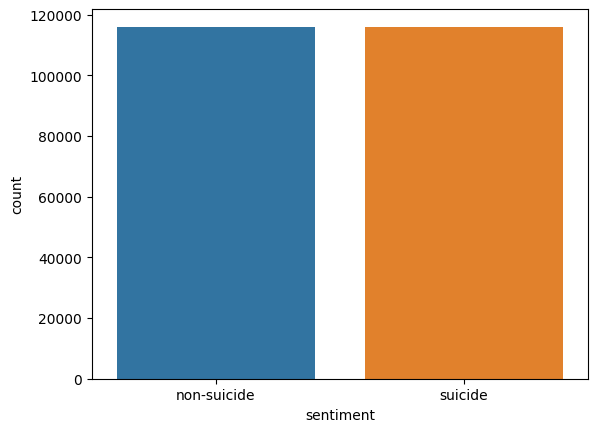

In [5]:
sns.countplot(x = 'sentiment' , data = data)

In [6]:
data['tweet'][1]

'Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God it\'s so annoying'

In [7]:
data['tweet']=data['tweet'].apply(str)

In [8]:
data['tweet'] = data['tweet'].str.lower()

In [9]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
data['tweet'] = data['tweet'].apply(lambda x : " ".join(t for t in x.split() if t not in stop_words))

In [11]:
data['tweet'] = data['tweet'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))

In [12]:
data['tweet'] = data['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [13]:
data['tweet'][1]

'finally 2020 almost over never hear 2020 bad year ever again swear fucking god annoying'

In [14]:
print(data[ data['sentiment'] == 'non-suicide'].size)
print(data[ data['sentiment'] == 'suicide'].size)

348036
348096


In [15]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['tweet'].values)
X = tokenizer.texts_to_sequences(data['tweet'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0, ...,   31,  685, 1447],
       [   0,    0,    0, ...,   32,  304,  910]], dtype=int32)

In [16]:
# Y = pd.get_dummies(data['sentiment']).values
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)

In [17]:
# Separate majority and minority classes
# data_majority = data[data['sentiment'] == 'suicide']
# data_minority = data[data['sentiment'] == 'non-suicide']

# bias = data_minority.shape[0]/data_majority.shape[0]

# lets split train/test data first then 
train = pd.concat([data.sample(frac=0.8,random_state=200),
         data.sample(frac=0.8,random_state=200)])
test = pd.concat([data.drop(data.sample(frac=0.8,random_state=200).index),
        data.drop(data.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [18]:
print('non-suicide data in training:',(train.sentiment == 'non-suicide').sum())
print('suicide data in training:',(train.sentiment == 'suicide').sum())
print('non-suicide data in test:',(test.sentiment == 'non-suicide').sum())
print('suicide data in test:',(test.sentiment == 'suicide').sum())

non-suicide data in training: 185828
suicide data in training: 185442
non-suicide data in test: 46196
suicide data in test: 46622


In [19]:
# DATASET
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 200
W2V_WINDOW = 7
W2V_EPOCH = 30
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 280
EPOCHS = 20
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

# New Section

In [20]:
# %%time
# documents = [_text.split() for _text in train.tweet] 

In [21]:
# import gensim
# word_model = gensim.models.Word2Vec(documents, vector_size=400, min_count=1, window=5)
# pretrained_weights = word_model.wv.vectors
# vocab_size, emdedding_size = pretrained_weights.shape
# print('Result embedding shape:', pretrained_weights.shape)


# def word2idx(word):
#   return word_model.wv.vocab[word].index
# def idx2word(idx):
#   return word_model.wv.index2word[idx]

In [22]:
# print(vocab_size)

In [23]:
# print(emdedding_size)

In [24]:
# print('Checking similar words:')
# for word in ['model', 'network', 'train', 'learn']:
#   most_similar = ', '.join('%s (%.2f)' % (similar, dist) 
#                            for similar, dist in word_model.wv.most_similar(word)[:8])
#   print('  %s -> %s' % (word, most_similar))

In [25]:
# word_model.wv.most_similar("love")

In [26]:
# print(pretrained_weights)

In [27]:
# # tokenizer = Tokenizer()
# # tokenizer.fit_on_texts(train.tweet)

# vocab_size = len(tokenizer.word_index) + 1
# print("Total words", vocab_size)

In [28]:
# print(len(pretrained_weights))

In [29]:
# lstm_out=128
# model = Sequential()
# model.add(Embedding(input_dim=186475, output_dim=emdedding_size, weights=[pretrained_weights]))
# model.add(SpatialDropout1D(0.4))

# model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
# model.add(Dense(2,activation='softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# print(model.summary())

In [30]:
# emdedding_size=100
# # vocab_size=207774

# model = Sequential()
# model.add(Embedding(207774,100, output_dim=207774, vocab_size=207774, weights=[pretrained_weights]))

# # model.add(Embedding(input_dim=vocab_size,input_length=SEQUENCE_LENGTH, output_dim=emdedding_size, weights=[pretrained_weights]))
# model.add(LSTM(units=emdedding_size))
# # model.add(Dense(units=vocab_size))
# model.add(Dense(2,activation='softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# print(model.summary())

# New Section

In [31]:
%%time
documents = [_text.split() for _text in train.tweet] 

CPU times: user 4.09 s, sys: 509 ms, total: 4.6 s
Wall time: 6.22 s


In [32]:
import gensim
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [36]:
w2v_model.build_vocab(documents)

In [37]:
words = w2v_model.wv.vectors
print(len(words))

35998


In [38]:
# print(words)

In [39]:
print(words)

[[-2.6811362e-04  1.1821568e-04  2.5516748e-03 ... -1.1957574e-03
  -4.7550471e-03  2.2529394e-03]
 [ 4.7281981e-05  1.5386599e-03 -3.4063226e-03 ... -3.7237937e-03
  -1.2530369e-03 -2.7749317e-03]
 [-3.5695075e-03  6.2051532e-04 -3.5883582e-03 ... -4.3460107e-03
   1.4807582e-03 -3.3379488e-03]
 ...
 [ 1.2574160e-03 -2.9001958e-03 -2.6197410e-03 ... -8.2840741e-04
  -4.4791684e-03  1.2129027e-03]
 [-1.2986046e-03  3.7319355e-03 -4.1068415e-03 ... -1.4151883e-03
  -2.0395231e-03 -1.7592746e-03]
 [-2.6270919e-03 -1.6712177e-03  9.8338607e-04 ...  3.6594330e-04
   1.9792735e-03  7.8167322e-05]]


In [41]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: user 31min 23s, sys: 6.85 s, total: 31min 30s
Wall time: 18min 2s


(666806373, 743114520)

In [42]:
w2v_model.wv.most_similar("love")

[('loved', 0.7152620553970337),
 ('loves', 0.6797728538513184),
 ('loving', 0.602475643157959),
 ('adore', 0.5711680054664612),
 ('wonderful', 0.5218357443809509),
 ('beautiful', 0.48442649841308594),
 ('amazing', 0.4841754138469696),
 ('truly', 0.48020681738853455),
 ('miss', 0.47625917196273804),
 ('cherish', 0.46614113450050354)]

In [34]:
def tsnescatterplot(w2v_model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 200), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = w2v_model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = w2v_model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 200 to 21 dimensions with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-21, Y[:, 0].max()+21)
    plt.ylim(Y[:, 1].min()-21, Y[:, 1].max()+21)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

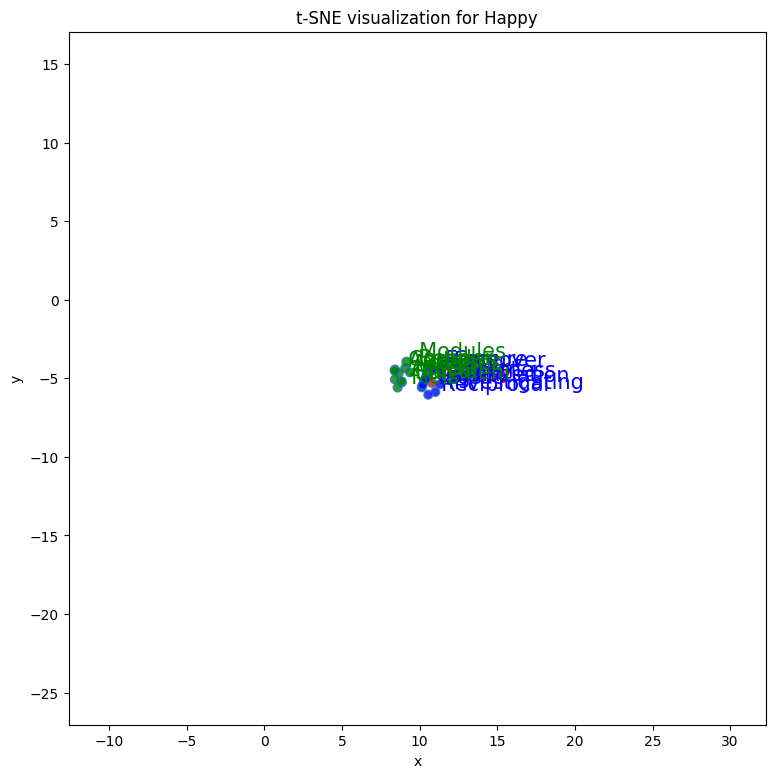

In [40]:
tsnescatterplot(w2v_model, 'happy', [i[0] for i in w2v_model.wv.most_similar(negative=["happy"])])

In [43]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.tweet)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 181170
CPU times: user 18.1 s, sys: 58.9 ms, total: 18.2 s
Wall time: 19.5 s


In [44]:
X_train = tokenizer.texts_to_sequences(data['tweet'].values)
X_train = pad_sequences(X_train,maxlen=280)
Y_train = pd.get_dummies(data['sentiment']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['tweet'].values)
X_test = pad_sequences(X_test,maxlen=280)
Y_test = pd.get_dummies(test['sentiment']).values
print("x_test shape", X_test.shape)

x_train shape: (232044, 280)
x_test shape (92818, 280)


In [45]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(181170, 200)


In [46]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH)

In [51]:
# embed_dim = 280
lstm_out = 128

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.25))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 280, 200)          36234000  
                                                                 
 dropout (Dropout)           (None, 280, 200)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               168448    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 36,402,706
Trainable params: 36,402,706
Non-trainable params: 0
_________________________________________________________________
None


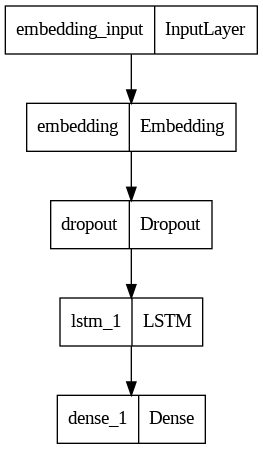

In [52]:
from keras.utils import plot_model
plot_model(model, to_file = 'model_istm.png')

In [ ]:
batch_size = 1024
# without adding weights

# history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 1)

history = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 1,  validation_split=0.2)

Epoch 1/20
182/182 [==============================] - 287s 2s/step - loss: 0.3493 - accuracy: 0.8534 - val_loss: 0.2558 - val_accuracy: 0.9210
Epoch 2/20
182/182 [==============================] - 269s 1s/step - loss: 0.2297 - accuracy: 0.9159 - val_loss: 0.2542 - val_accuracy: 0.9216
Epoch 3/20
182/182 [==============================] - 264s 1s/step - loss: 0.1994 - accuracy: 0.9267 - val_loss: 0.2149 - val_accuracy: 0.9326
Epoch 4/20
182/182 [==============================] - 263s 1s/step - loss: 0.1882 - accuracy: 0.9298 - val_loss: 0.2094 - val_accuracy: 0.9307
Epoch 5/20
182/182 [==============================] - 263s 1s/step - loss: 0.1770 - accuracy: 0.9337 - val_loss: 0.1854 - val_accuracy: 0.9367
Epoch 6/20
182/182 [==============================] - 254s 1s/step - loss: 0.1760 - accuracy: 0.9340 - val_loss: 0.1827 - val_accuracy: 0.9385
Epoch 7/20
182/182 [==============================] - 257s 1s/step - loss: 0.1611 - accuracy: 0.9395 - val_loss: 0.1719 - val_accuracy: 0.9411

In [ ]:
model.evaluate(X_test, Y_test)

2901/2901 [==============================] - 231s 80ms/step - loss: 0.1229 - accuracy: 0.9581


[0.1229289099574089, 0.958111584186554]

In [ ]:
def display_plot(history,train,validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train/Validation accuracy Vs No. of epochs')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
# def display_plot(history,train):
#     plt.plot(history.history[train])
#     plt.title('Train accuracy Vs No. of epochs')
#     plt.ylabel(train)
#     plt.xlabel('Epoch')
#     plt.legend(['train'], loc='upper left')
#     plt.show()

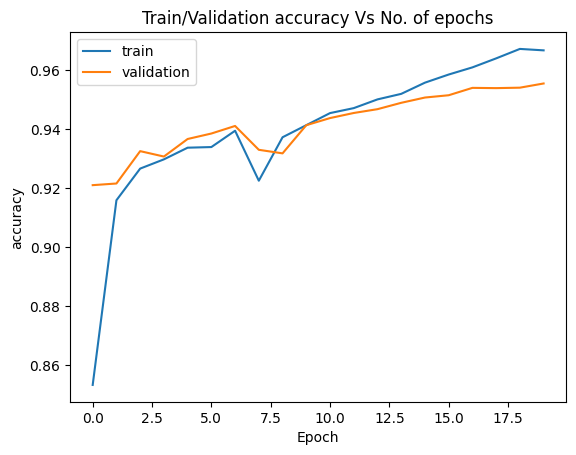

In [ ]:
display_plot(history,'accuracy','val_accuracy')
# display_plot(history,'accuracy')

In [ ]:
def display_plot(history,loss,val_loss):
    plt.plot(history.history[loss])
    plt.plot(history.history[val_loss])
    plt.title('loss/val_loss accuracy Vs No. of epochs')
    plt.ylabel(loss)
    plt.xlabel('Epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

In [ ]:
mythreshold=0.5
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>=mythreshold).astype(int)
cm=confusion_matrix(
    Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

2901/2901 [==============================] - 234s 80ms/step
[[44768  1428]
 [ 2460 44162]]


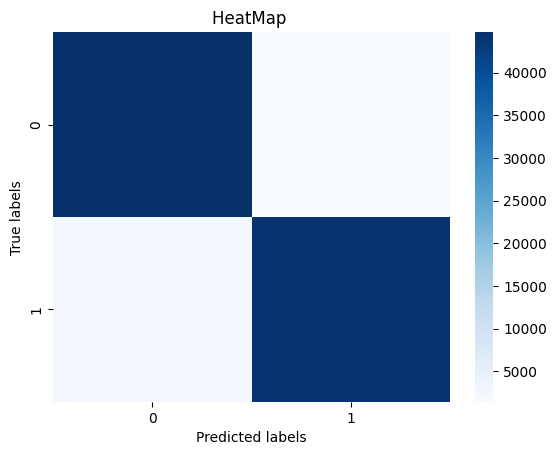

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('HeatMap ')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_curve
# thresholds=0.5
y_preds = model.predict(X_test)[::,1]
fpr, tpr, thresholdes = roc_curve(Y_test.argmax(axis=1), y_preds)

2901/2901 [==============================] - 231s 80ms/step


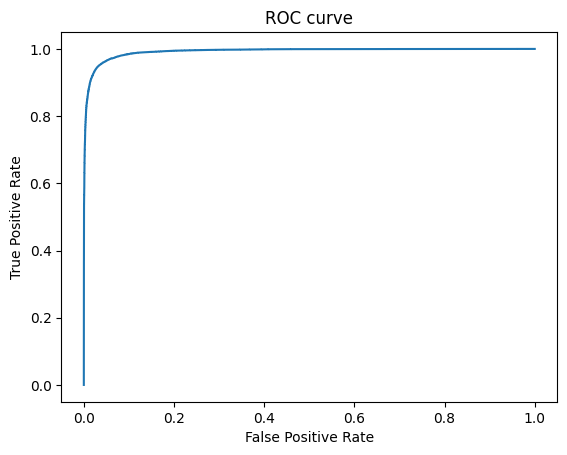

In [ ]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import auc
import sklearn.metrics as metrics

In [ ]:
# thresholds=0.5
y_pred_proba  = model.predict(X_test)[::,1]
fpr, tpr, thresholdes = roc_curve(Y_test.argmax(axis=1), y_preds)
auc = metrics.roc_auc_score(Y_test.argmax(axis=1), y_pred_proba)

In [ ]:
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.legend(loc=4)

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report

print (classification_report(Y_test, y_pred))

In [ ]:
song=pd.read_csv('Song.csv')
# type(data.tweet)
song.head()

In [ ]:
user=pd.read_csv('suicidal-tendency-users.csv')
# type(data.tweet)
user.head()

In [ ]:
def getPositiveSong(userId, songType=None):
    if(userId > 227): return 'Invalid user Id'
    if(songType==None):
      userAge=-1
      for index, value in enumerate(user.user_id):
        if value == userId:
          userAge = user.age[index]
          break
      if(userAge <= 25): songType = 'bollywood'
      if(userAge > 25 & userAge <= 35): songType = 'classical'
      if(userAge > 35): songType = 'ghazal'
    isValidSongType = songType in ['bollywood', 'classical', 'ghazal']
    if(isValidSongType == False): return 'Invalid Song Type'
    songsIndexes = []
    for idx,value in enumerate(song.song_type) :
        if(value == songType):
            songsIndexes.append(idx)
    
    return song.song_name[random.choice(songsIndexes)]
getPositiveSong(4)

In [ ]:
def getSongByAgeAndType(userAge, songType=None):
    if(userAge < 0): return 'Invalid User Age'
    if(songType==None):
      if(userAge <= 25): songType = 'bollywood'
      if(userAge > 25 & userAge <= 35): songType = 'classical'
      if(userAge > 35): songType = 'ghazal'
      
    isValidSongType = songType in ['bollywood', 'classical', 'ghazal']
    if(isValidSongType == False): return 'Invalid Song Type'
    songsIndexes = []
    for idx,value in enumerate(song.song_type) :
        if(value == songType):
            songsIndexes.append(idx)
    
    return song.song_name[random.choice(songsIndexes)]
getSongByAgeAndType(20, 'ghazal')

In [ ]:
twt = ["@cheer_wine @nglfusa So gays and lesbians must attracted to everyone thatâ€™s their sex? Why use buck anyway he has already stated quit using him as a gotcha. Everyone is just a fucking pawn to you people.",
      "@OrwellNGoode This gives me Big Bang vibes",
      "@kurtistrippdied Looking forward to reading them, thanks for all the work you do hon. I wish I could do more. I am just not the best in front of the camera.", 
      "@cashewsandeggs @burgerbi1 MLM has been gaining popularity the last 2 or 3 years. Popularity with homosexuality has diminished so these other terms along side other gender woowoo speak.,"
      "@cashewsandeggs @burgerbi1 The â€œmajorityâ€ of boy love and Yaoi, is written by straight women. Of course it would be straight women who would fetishize it.",
      "@ModernTosspot @kurtistrippled @Jebadoo2 to go to treatment if they are actively suicidal it would be detrimental to treatment. Stabilization fund out why they want to be on hormones delve into the trauma. Get them to put down the weapons and find the self acceptance.",
      "@notsmokinfeds @DirtyDianaDyke @LiberatedLezzy Just a heads head up she think she going goofy hunting would keep an eye out on your page and might want to talk to her walk again about the way she being overtly homophobic",
      "Gaslighting by TRAâ€™s, know no bounds!!!   Letâ€™s use the terms that they call women  Uterus Haverâ€™s Vagina Havers Cis Women Pregnant People  Recognizing same sex attracted people for what they are isnâ€™t misogyny or bigotry.   Stop the Homophobia",
      "@AdilRas22745938 @dwivedimk_ias @jkmediasocial @manojsinha_ @ndtv @SupremeCourtFan @BJP4India @BJP4JnK @jwjnational @rashtrapatibhvn @VPSecretariat @INCIndia @BBCBreaking @LokSabhaSectt @LoPIndia @loksabhaspeaker @narendramodi @graduates Higher education is not a crime. We have two options left now 1) suicide 2) Class IV job",
      "@OfficeOfLGJandK We have already approached your office several times but you never tried to meet us. Please save the youth of kashmir. Graduates want to live. Graduate lives matter. We have not illegal demand, we are in merit list. Just consider graduatea for final selection. ðŸ™Please",
      "@OfficeOfLGJandK Sir why are you not listening to graduate aspirants of class IV. Please save us from suicide. We want to feed our family. Sir please help us. Please intervene. Our demand is not illegal. Higher education is not a crime. #justiceforgraduates"
      ]
user_age= 20
song_type = 'ghazal'
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=100, dtype='int32', value=0)
sentiment = model.predict(twt,batch_size=BATCH_SIZE,verbose = 1)
sentiment_arr = np.argmax(sentiment, axis=0)
count_neg_pog_arr = np.bincount(sentiment_arr)
print(count_neg_pog_arr)
print(sentiment_arr)

if(count_neg_pog_arr[0]>count_neg_pog_arr[1]):
    print(getSongByAgeAndType(user_age, song_type))
elif (count_neg_pog_arr[0]<count_neg_pog_arr[1]):
    print("Non-depressed")
else:
    print("Neutral")

In [ ]:
twt = ["@OrwellNGoode This gives me Big Bang vibes",
      "@kurtistrippdied Looking forward to reading them, thanks for all the work you do hon. I wish I could do more. I am just not the best in front of the camera.", 
      "@cashewsandeggs @burgerbi1 MLM has been gaining popularity the last 2 or 3 years. Popularity with homosexuality has diminished so these other terms along side other gender woowoo speak.",
      "@cashewsandeggs @burgerbi1 The â€œmajorityâ€ of boy love and Yaoi, is written by straight women. Of course it would be straight women who would fetishize it.",
      "@ModernTosspot @kurtistrippled @Jebadoo2 to go to treatment if they are actively suicidal it would be detrimental to treatment. Stabilization fund out why they want to be on hormones delve into the trauma. Get them to put down the weapons and find the self acceptance.",
      "@notsmokinfeds @DirtyDianaDyke @LiberatedLezzy Just a heads head up she think she going goofy hunting would keep an eye out on your page and might want to talk to her walk again about the way she being overtly homophobic",
      "@AdilRas22745938 @dwivedimk_ias @jkmediasocial @manojsinha_ @ndtv @SupremeCourtFan @BJP4India @BJP4JnK @jwjnational @rashtrapatibhvn @VPSecretariat @INCIndia @BBCBreaking @LokSabhaSectt @LoPIndia @loksabhaspeaker @narendramodi @graduates Higher education is not a crime. We have two options left now 1) suicide 2) Class IV job",
      "I DONT KNOW WHAT I HAVE HAVENT BEEN DIAGNOSED BUT ALL I KNOW IS WHAT IVE BEEN THROUGH. ALL I KNOW IS HOW TO HANDLE ALL MY SHIT AND LOVE OTHERS.   I'm so tired of feeling the need to verify my life, experiences, and purpose.    Do I deserve to gaslight my life?  I'm just me.",
      "We take amazing things in person for granted, because we see and absorb so much on the regular through our screens.  We seek human connection and validation through something so inhuman. Through computers.  Its no wonder why everyone's fill so disipointing. Get out! Live ya life hoe!"]
user_age= 30
song_type = None
  
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=100, dtype='int32', value=0)
sentiment = model.predict(twt,batch_size=BATCH_SIZE,verbose = 1)
sentiment_arr = np.argmax(sentiment, axis=1)
count_neg_pog_arr = np.bincount(sentiment_arr)
print(count_neg_pog_arr)
# print(sentiment_arr)

if(count_neg_pog_arr[0]>count_neg_pog_arr[1]):
    print(getSongByAgeAndType(user_age, song_type))
elif (count_neg_pog_arr[0]<count_neg_pog_arr[1]):
    print("Non-depressed")
else:
    print("Neutral")

In [ ]:
twt = [
      # "@OrwellNGoode This gives me Big Bang vibes",
      "@kurtistrippdied Looking forward to reading them, thanks for all the work you do hon. I wish I could do more. I am just not the best in front of the camera.", 
      # "@cashewsandeggs @burgerbi1 MLM has been gaining popularity the last 2 or 3 years. Popularity with homosexuality has diminished so these other terms along side other gender woowoo speak.",
      "@cashewsandeggs @burgerbi1 The â€œmajorityâ€ of boy love and Yaoi, is written by straight women. Of course it would be straight women who would fetishize it.",
      "@ModernTosspot @kurtistrippled @Jebadoo2 to go to treatment if they are actively suicidal it would be detrimental to treatment. Stabilization fund out why they want to be on hormones delve into the trauma. Get them to put down the weapons and find the self acceptance.",
      "@notsmokinfeds @DirtyDianaDyke @LiberatedLezzy Just a heads head up she think she going goofy hunting would keep an eye out on your page and might want to talk to her walk again about the way she being overtly homophobic",
      "@AdilRas22745938 @dwivedimk_ias @jkmediasocial @manojsinha_ @ndtv @SupremeCourtFan @BJP4India @BJP4JnK @jwjnational @rashtrapatibhvn @VPSecretariat @INCIndia @BBCBreaking @LokSabhaSectt @LoPIndia @loksabhaspeaker @narendramodi @graduates Higher education is not a crime. We have two options left now 1) suicide 2) Class IV job",
      "I DONT KNOW WHAT I HAVE HAVENT BEEN DIAGNOSED BUT ALL I KNOW IS WHAT IVE BEEN THROUGH. ALL I KNOW IS HOW TO HANDLE ALL MY SHIT AND LOVE OTHERS.   I'm so tired of feeling the need to verify my life, experiences, and purpose.    Do I deserve to gaslight my life?  I'm just me.",
      "We take amazing things in person for granted, because we see and absorb so much on the regular through our screens.  We seek human connection and validation through something so inhuman. Through computers.  Its no wonder why everyone's fill so disipointing. Get out! Live ya life hoe!"
      ]
user_age= 20
song_type = 'ghazal'
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=128, dtype='int32', value=0)
sentiment = model.predict(twt,batch_size=1,verbose = 1)
sentiment_arr = np.argmax(sentiment, axis=1)
count_neg_pog_arr = np.bincount(sentiment_arr)
print(count_neg_pog_arr)
print(sentiment_arr)

if(count_neg_pog_arr[0]>count_neg_pog_arr[1]):
    print(getSongByAgeAndType(user_age, song_type))
elif (count_neg_pog_arr[0]<count_neg_pog_arr[1]):
    print("Non-depressed")
else:
    print("Neutral")

In [ ]:
twt = [
      "i going to die",
      "i kill you",
      "i are very good",
      # "@OrwellNGoode This gives me Big Bang vibes",
      # "@kurtistrippdied Looking forward to reading them, thanks for all the work you do hon. I wish I could do more. I am just not the best in front of the camera.", 
      # "@cashewsandeggs @burgerbi1 MLM has been gaining popularity the last 2 or 3 years. Popularity with homosexuality has diminished so these other terms along side other gender woowoo speak.",
      # "@cashewsandeggs @burgerbi1 The â€œmajorityâ€ of boy love and Yaoi, is written by straight women. Of course it would be straight women who would fetishize it.",
      "@ModernTosspot @kurtistrippled @Jebadoo2 to go to treatment if they are actively suicidal it would be detrimental to treatment. Stabilization fund out why they want to be on hormones delve into the trauma. Get them to put down the weapons and find the self acceptance.",
      "@notsmokinfeds @DirtyDianaDyke @LiberatedLezzy Just a heads head up she think she going goofy hunting would keep an eye out on your page and might want to talk to her walk again about the way she being overtly homophobic",
      "@AdilRas22745938 @dwivedimk_ias @jkmediasocial @manojsinha_ @ndtv @SupremeCourtFan @BJP4India @BJP4JnK @jwjnational @rashtrapatibhvn @VPSecretariat @INCIndia @BBCBreaking @LokSabhaSectt @LoPIndia @loksabhaspeaker @narendramodi @graduates Higher education is not a crime. We have two options left now 1) suicide 2) Class IV job",
      "I DONT KNOW WHAT I HAVE HAVENT BEEN DIAGNOSED BUT ALL I KNOW IS WHAT IVE BEEN THROUGH. ALL I KNOW IS HOW TO HANDLE ALL MY SHIT AND LOVE OTHERS.   I'm so tired of feeling the need to verify my life, experiences, and purpose.    Do I deserve to gaslight my life?  I'm just me.",
      # "We take amazing things in person for granted, because we see and absorb so much on the regular through our screens.  We seek human connection and validation through something so inhuman. Through computers.  Its no wonder why everyone's fill so disipointing. Get out! Live ya life hoe!"
      ]
user_age= 20
song_type = 'ghazal'
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=128, dtype='int32', value=0)
sentiment = model.predict(twt,batch_size=1,verbose = 1)
sentiment_arr = np.argmax(sentiment, axis=1)
count_neg_pog_arr = np.bincount(sentiment_arr)
print(count_neg_pog_arr)
print(sentiment_arr)

if(count_neg_pog_arr[0]>count_neg_pog_arr[1]):
    print(getSongByAgeAndType(user_age, song_type))
elif (count_neg_pog_arr[0]<count_neg_pog_arr[1]):
    print("Non-depressed")
else:
    print("Neutral")